<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [5]:
def dfs(G, origen, destino):
    stack = [(origen, [origen])]
    visited = set()
    expanded = 0
    while stack:
        (nodo, path) = stack.pop()
        if nodo not in visited:
            if nodo == destino:
                return {'path' : path, 'expanded' : expanded}
            
            visited.add(nodo)
            for neighbor in G[nodo]:
                stack.append((neighbor, path + [neighbor]))
                expanded += 1

{'path': [1, 4, 5, 8, 7], 'expanded': 10}


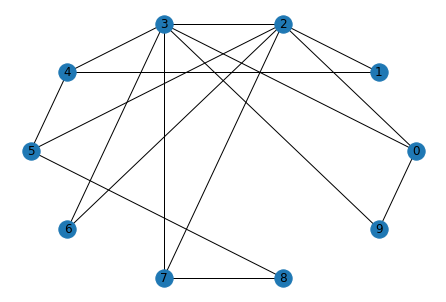

In [6]:
import networkx as nx
G = nx.generators.barabasi_albert_graph(10, 2)
print(dfs(G, 1, 7))
nx.draw_circular(G, with_labels=True)

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [17]:
import collections
def cnx(G):
    visited = set()
    BFRL = [] #Big Falcon Return List
    connex_graph_list = []
    
    for node in G: #We iterate for every node in the graph.
        if node in visited: #If we already visited the node we skip it so it's a bit faster.
            continue
            
        if connex_graph_list:
            BFRL.append(connex_graph_list) #If a component list exists from a previous iteration we add it to the BFRL.
        connex_graph_list = [node] #For every iteration we clear the component list.
        
        
        neighbor_queue = collections.deque()
        neighbor_list_init = [n for n in G.neighbors(node)]
        for i in neighbor_list_init: #We add the nodes to the to visit queue.
            neighbor_queue.append(i)
        
        while neighbor_queue:
            neighbor_node = neighbor_queue.popleft()
            visited.add(neighbor_node) #We set as visited the current node.
            
            if neighbor_node not in connex_graph_list: #We add the current node in the component list if not added yet.
                connex_graph_list.append(neighbor_node) 
                
            aux = [n for n in G.neighbors(neighbor_node)] #We get the current node's not visited neighbor list.
            for i in aux:
                if i not in visited:
                    neighbor_queue.append(i)
                    
    BFRL.append(connex_graph_list) #We add the last component
    return BFRL

[[0, 14, 13, 10, 11, 9, 8, 5, 12, 4, 3, 6, 7, 1, 2], [15, 16], [17, 20, 25, 23, 21, 29, 19, 28, 22, 18, 27, 26, 24], [30, 35, 36, 38, 31, 34, 32, 39, 37, 33], [40, 42, 47, 44, 51, 41, 46, 50, 49, 53, 45, 43, 48, 52]]
Connex component(s): 5


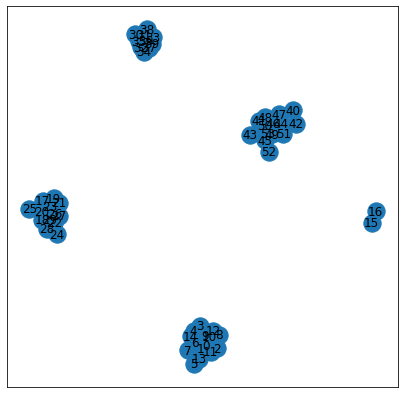

In [22]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
print(cnx(G))
print ("Connex component(s): " + str(len(cnx(G))))
draw(G)